<a href="https://colab.research.google.com/github/gamesMum/ChineseSignsClassification/blob/master/Signs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Test for CUDA**

In [34]:
# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


1. Upload zip file signs.zip to 'My Drive' 
2. Mount your drive using code below. 

In [6]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


 3. Unzip the file:



You just unziped your folder. Take a look at the structure, and pictures

In [7]:
!unzip "/content/drive/My Drive/signs.zip" -d "sign"

Archive:  /content/drive/My Drive/signs.zip
   creating: sign/signs/
   creating: sign/signs/valid/
   creating: sign/signs/valid/pig/
  inflating: sign/signs/valid/pig/00000563.jpg  
  inflating: sign/signs/valid/pig/00000205.jpg  
  inflating: sign/signs/valid/pig/00000211.jpg  
  inflating: sign/signs/valid/pig/00000577.jpg  
  inflating: sign/signs/valid/pig/00000588.jpg  
  inflating: sign/signs/valid/pig/00000742.jpeg  
  inflating: sign/signs/valid/pig/00000589.jpg  
  inflating: sign/signs/valid/pig/00000210.jpg  
  inflating: sign/signs/valid/pig/00000576.jpg  
  inflating: sign/signs/valid/pig/00000562.jpg  
  inflating: sign/signs/valid/pig/00000238.jpg  
  inflating: sign/signs/valid/pig/00000200.jpeg  
  inflating: sign/signs/valid/pig/00000650.jpeg  
  inflating: sign/signs/valid/pig/00000012.jpg  
  inflating: sign/signs/valid/pig/00000760.jpg  
  inflating: sign/signs/valid/pig/00000199.jpg  
  inflating: sign/signs/valid/pig/00000600.jpg  
  inflating: sign/signs/valid

In [0]:
import os
os.chdir("/content/sign/")

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models


Define transforms, rezise, rotate slightly, preform horizontal flip

In [0]:
data_dir = 'signs'

batch_size = 64
# TODO: Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.Resize((256, 256)),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.RandomRotation(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.5, 0.5, 0.5],
                                                           [0.5, 0.5, 0.5])])

test_transforms = transforms.Compose([transforms.Resize(256, 256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.5, 0.5, 0.5],
                                                           [0.5, 0.5, 0.5])])

# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)
valid_data = datasets.ImageFolder(data_dir + "/valid", transform=transforms )

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)
valis_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size)

# specify the image classes
classes = ['dog', 'dragon', 'goat', 'horse', 'monkey', 'ox', 'pig', 'rabbit', 
           'ratt', 'rooster', 'snake', 'tiger']

### Visualize a Batch of Training Data

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


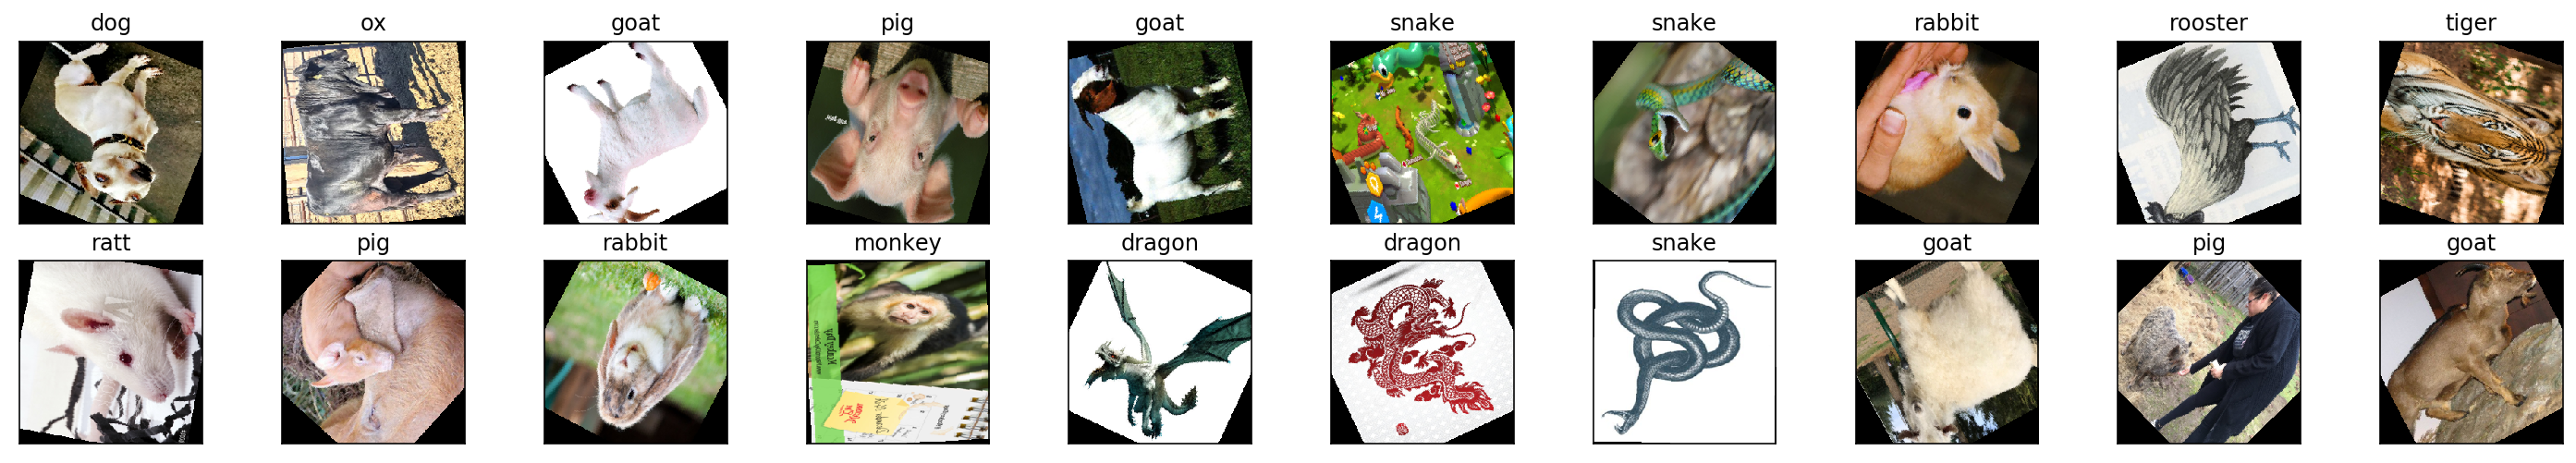

In [30]:
# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])
  

### View an Image in More Detail

Here, we look at the normalized red, green, and blue (RGB) color channels as three separate, grayscale intensity images.

In [31]:
import numpy as np
rgb_img = np.squeeze(images[3])
channels = ['red channel', 'green channel', 'blue channel']

fig = plt.figure(figsize = (36, 36)) 
for idx in np.arange(rgb_img.shape[0]):
    ax = fig.add_subplot(1, 3, idx + 1)
    img = rgb_img[idx]
    ax.imshow(img, cmap='gray')
    ax.set_title(channels[idx])
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            val = round(img[x][y],2) if img[x][y] !=0 else 0
            ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center', size=8,
                    color='white' if img[x][y]<thresh else 'black')

Error in callback <function flush_figures at 0x7f7072e46730> (for post_execute):


KeyboardInterrupt: ignored

# **Build The Model**

________________________________

In [49]:
import torch.nn as nn
import torch.nn.functional as FF

#Define the CNN architecture
class Net(nn.Module):
  def __init__(self):
      super(Net, self).__init__()
      # convolutional layer (sees 256 * 256 * 3 image tensor)
      self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
      # convolutional layer (sees 128 * 128 * 16 tensor)
      self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
      # convolutional layer (sees 64 * 64 * 32 tensor)
      self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
      # max pooling layer
      self.pool = nn.MaxPool2d(2, 2)
      # linear layer (64 * 32 * 32 -> 500)
      self.fc1 = nn.Linear(64 * 32 * 32, 500)
      # linear layer (500 -> 10)
      self.fc2 = nn.Linear(500, 12)
      # dropout layer (p=0.25)
      self.dropout = nn.Dropout(0.25)
  
  def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        # flatten image input
        x = x.view(-1, 64 * 32 * 32)
        # add dropout layer
        x = self.dropout(x)
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add 2nd hidden layer, with relu activation function
        x = self.fc2(x)
        return x

# create a complete CNN
model = Net()
print(model)

# move tensors to GPU if CUDA is available
if train_on_gpu:
    model.cuda()

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=65536, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=12, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)


Define the optimizer and the error function

In [0]:
import torch.optim as optim
#the loss function
criterion = nn.CrossEntropyLoss()

#the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

# **Testing**

In [51]:
# number of epochs to train the model
import numpy as np
n_epochs = 30

valid_loss_min = np.Inf # track change in validation loss

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model.train()
    for batch_idx, (images, labels) in enumerate(train_loader):
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            images, labels = images.cuda(), labels.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(images)
        # calculate the batch loss
        loss = criterion(output, labels)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*images.size(0)
        
    ######################    
    # validate the model #
    ######################
    model.eval()
    for batch_idx, (images, labels) in enumerate(valid_loader):
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            images, labels = images.cuda(), labels.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(images)
        # calculate the batch loss
        loss = criterion(output, labels)
        # update average validation loss 
        valid_loss += loss.item()*images.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(valid_loader.sampler)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_augmented.pt')
        valid_loss_min = valid_loss

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


OSError: ignored